<a href="https://colab.research.google.com/github/Remil-Maha/ML-Notebooks/blob/main/NLP_SPAM_HAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

**Representing text as numerical data**

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

we are going to use countvectorizer  : it converts a collection of text documents to a matrix of tokens counts


---

### 📌 **Qu'est-ce que la vectorisation du texte ?**  
En **Machine Learning**, les algorithmes ne comprennent pas directement le texte sous forme de mots ou de phrases. Il faut donc transformer ces textes en **vecteurs numériques** pour qu'ils puissent être traités par des modèles.

Cette transformation s'appelle la **vectorisation du texte**. Il existe plusieurs méthodes pour le faire.

---

## 🛠️ **Méthodes de vectorisation du texte**  

### **1️⃣ Bag of Words (BoW)**
🔹 **Principe** :  
- On représente un texte par la **fréquence d'apparition** des mots dans un vecteur.  
- Pas de prise en compte de l’ordre des mots.  

🔹 **Exemple** :  
Si on a ces deux phrases :  
1. "Le chat dort."  
2. "Le chien court."  

Vocabulaire unique = `["Le", "chat", "dort", "chien", "court"]`  
Représentation sous forme de vecteur (matrice d'occurrences) :  

| Phrase         | Le | chat | dort | chien | court |
|---------------|----|------|------|-------|-------|
| "Le chat dort" | 1  | 1    | 1    | 0     | 0     |
| "Le chien court" | 1  | 0    | 0    | 1     | 1     |

📌 **Limites** :
- Ne prend pas en compte le sens du mot.  
- La taille du vecteur est aussi grande que le vocabulaire total (peut être énorme).

---

### **2️⃣ TF-IDF (Term Frequency - Inverse Document Frequency)**
🔹 **Principe** :  
- **TF (Term Frequency)** : fréquence du mot dans le document.  
- **IDF (Inverse Document Frequency)** : importance du mot dans **tous** les documents (pour éviter que les mots trop fréquents comme "le", "et" aient trop d'importance).  

🔹 **Formule** :
\[
\text{TF-IDF} = TF \times IDF
\]
- Plus un mot est fréquent dans un document **et rare dans l’ensemble des documents**, plus il a du poids.

📌 **Avantages** :
- Prend en compte l’importance des mots dans **plusieurs documents**.  
- Meilleur que BoW pour repérer des mots significatifs.

---

### **3️⃣ Word Embeddings (Word2Vec, GloVe, FastText)**
🔹 **Principe** :  
- Associe à chaque mot un **vecteur dense de taille fixe** (ex : 100 dimensions).  
- Les mots ayant un sens proche ont des **vecteurs proches**.  
- Modèles entraînés sur **d’énormes corpus de textes**.  

🔹 **Exemple de Word2Vec :**
- "Roi" et "Reine" auront des vecteurs proches.
- On peut même faire des calculs comme :
  \[
  \text{"Roi"} - \text{"Homme"} + \text{"Femme"} \approx \text{"Reine"}
  \]

📌 **Avantages** :
- Capture **le contexte et le sens** des mots.  
- Utile pour les modèles avancés (LSTMs, Transformers).  
- Beaucoup plus compact que BoW ou TF-IDF.

---

### **4️⃣ Transformers et modèles pré-entraînés (BERT, GPT)**
🔹 **Principe** :  
- Utilisent un modèle neuronal avancé pour représenter **chaque mot en fonction de son contexte**.  
- Ex : dans *"La banque est au bord de la rivière."* et *"Je vais à la banque pour un prêt."*, le mot **banque** aura des vecteurs différents.  
- Représentation obtenue à partir de modèles comme **BERT, GPT, T5**.

📌 **Avantages** :
- Comprend **le contexte et les relations entre mots**.  
- Donne de bien meilleurs résultats pour le NLP.

---

## 🎯 **Quelle méthode choisir ?**
| Méthode       | Avantages | Inconvénients | Utilisation |
|--------------|-----------|--------------|-------------|
| **BoW** | Simple, rapide | Ignorance du contexte | Modèles basiques |
| **TF-IDF** | Meilleure pondération des mots | Pas de relation entre mots | Recherche de mots-clés |
| **Word2Vec/GloVe** | Capture le sens des mots | Besoin d’un bon corpus | NLP avancé |
| **BERT/GPT** | Compréhension du contexte | Très gourmand en calcul | Chatbots, résumé automatique |

---

### **📌 Conclusion**
✅ **Pour des tâches simples (ex : classification), TF-IDF peut suffire.**  
✅ **Pour des modèles plus avancés, les embeddings (Word2Vec, GloVe) sont préférables.**  
✅ **Pour des modèles d’État de l’Art, il faut utiliser des modèles comme BERT ou GPT.**

---


### 📌 **Comment calculer TF-IDF ?**  

Le **TF-IDF (Term Frequency - Inverse Document Frequency)** est une méthode de pondération qui permet de mesurer l'importance d'un mot dans un document, tout en tenant compte de sa fréquence dans l'ensemble des documents. Il se compose de deux parties :  

1. **TF (Term Frequency) - Fréquence du mot dans un document**  
2. **IDF (Inverse Document Frequency) - Importance du mot dans le corpus**  

---

## 1️⃣ **Calcul du TF (Term Frequency)**
Le **TF** mesure la fréquence d’un mot \( t \) dans un document \( d \).

\[
TF(t, d) = \frac{\text{Nombre d'occurrences de } t \text{ dans } d}{\text{Nombre total de mots dans } d}
\]

📌 **Exemple** :  
Si on a le document suivant :  
📜 *"Le chat dort. Le chien aboie."*  

- **Vocabulaire unique** : `["Le", "chat", "dort", "chien", "aboie"]`
- **Nombre total de mots** = **5**  
- **Nombre d'occurrences de "chat"** = **1**  
- **TF("chat")** = \( 1/5 = 0.2 \)  

---

## 2️⃣ **Calcul du IDF (Inverse Document Frequency)**
Le **IDF** mesure l’importance du mot dans **tous les documents** du corpus.  
L'idée est que les mots très courants (comme "le", "de", "et") ont moins d'importance.  

\[
IDF(t) = \log \left( \frac{N}{DF(t)} \right)
\]

- \( N \) = Nombre total de documents  
- \( DF(t) \) = Nombre de documents contenant le mot \( t \)  

📌 **Exemple** :  
Imaginons un corpus de **3 documents** :

1️⃣ `"Le chat dort"`  
2️⃣ `"Le chien aboie"`  
3️⃣ `"Le chat mange"`  

- **Le mot "chat" apparaît dans 2 documents sur 3**, donc :  
  \[
  IDF("chat") = \log(3/2) \approx 0.176
  \]

- **Le mot "le" apparaît dans tous les documents**, donc :  
  \[
  IDF("le") = \log(3/3) = 0
  \]  
  → Le mot "le" est ignoré car il est trop fréquent.

---

## 3️⃣ **Calcul du TF-IDF**
Le **TF-IDF** est simplement le produit de TF et IDF :

\[
TF-IDF(t, d) = TF(t, d) \times IDF(t)
\]

📌 **Exemple pour "chat" dans le document `"Le chat dort"`** :  
- \( TF("chat") = 0.2 \)  
- \( IDF("chat") = 0.176 \)  
- \( TF-IDF("chat") = 0.2 \times 0.176 = 0.0352 \)  

---

## 🔧 **Implémentation en Python**
Avec **scikit-learn**, on peut calculer le **TF-IDF** facilement :

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Corpus de documents
documents = ["Le chat dort", "Le chien aboie", "Le chat mange"]

# Initialisation du vectorizer
vectorizer = TfidfVectorizer()

# Calcul du TF-IDF
tfidf_matrix = vectorizer.fit_transform(documents)

# Affichage des mots et des valeurs TF-IDF
print(vectorizer.get_feature_names_out())  # Mots du vocabulaire
print(tfidf_matrix.toarray())  # Matrice TF-IDF
```

---

## 🔥 **Pourquoi utiliser TF-IDF ?**
✅ Il filtre les **mots trop fréquents** (stopwords) comme "le", "de"  
✅ Il met en avant les **mots importants pour chaque document**  
✅ Il est utilisé pour **la classification de texte**, **la recherche d’informations**, **les moteurs de recherche**, etc.  


In [ ]:
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE!']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer() #convertit un texte en une matrice de comptage des mots (Bag of Words - BoW).
vect.fit(simple_train)#analyse le corpus de texte contenu dans simple_train et extrait tous les mots uniques pour construire un dictionnaire (vocabulaire).
#Il ne transforme pas encore les textes en vecteurs, il se contente d'apprendre les mots.
vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [ ]:
# transform training data into a 'document-term matrix'
simple_train_dtm=vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

Remarque : sparse matrix est une matrice qui est utilisée pour ne garder en memoire que les elements non nuls et leurs indices au lieu de stocker tous les  0 ex  : (0,1)  1 => le mot d'indice 1 apparait une fois dans le document 0 .

In [ ]:
# convertir soarse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [ ]:
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [ ]:
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [ ]:
simple_test = ["please don't call me"]

In order to make a prediction, the new observation must have the same features as the training observations, both in number and meaning.

In [ ]:
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [ ]:
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


vect.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

**Reading a text-based dataset into pandas**

In [ ]:
sms = pd.read_csv("spam.csv", encoding='latin-1')
sms.dropna(how="any",inplace=True , axis = 1)#Supprime une colonne si au moins un NaN est présent.
sms.columns=['label','message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Exploratory Data Analysis**

In [ ]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
# conversion
sms['label_num']=sms.label.map({'ham':0 , 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

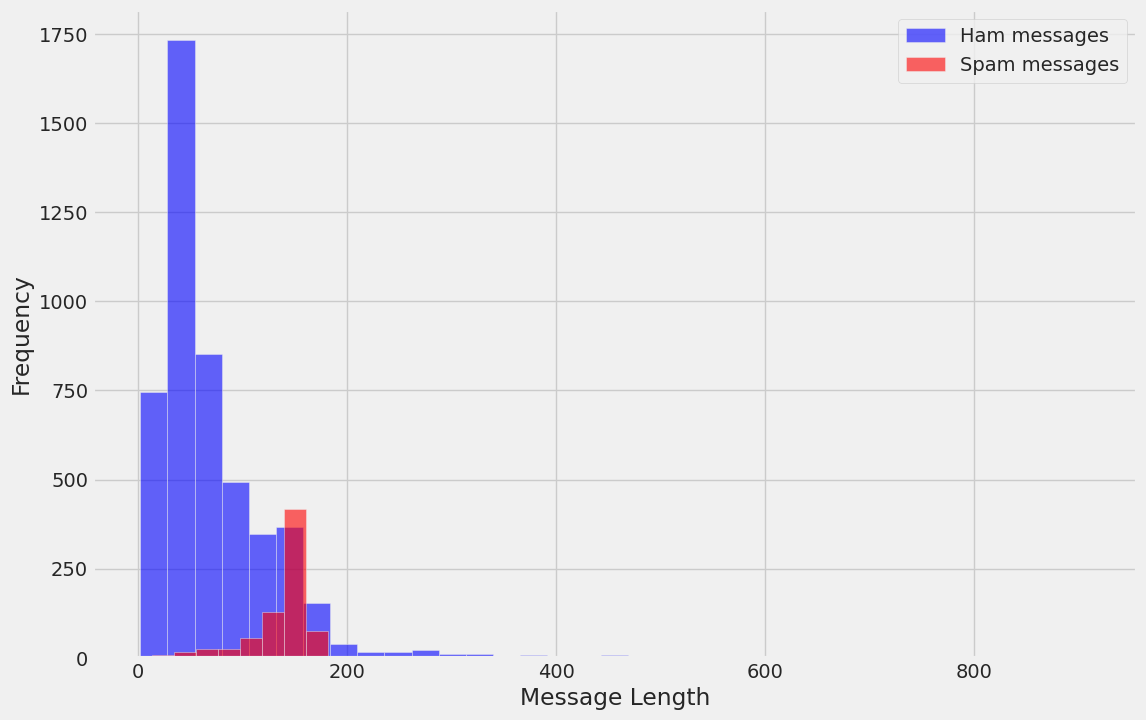

In [ ]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

On peut remarquer que les spam ont plus de caracteres que les ham

In [ ]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [ ]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [ ]:
sms[sms.message_len==910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

**Text Pre-Processing**

In [ ]:
# we are going to write a funxtion that splits de text into its individual words and return a list
# on va enlever la ponctuation
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
def text_process(message):

    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # en anglais les stopword snot les mots courants ex  :the ,a ,and , of ...

    # on verifier s'il y a de la pnoctuation
    nonpunc = ''.join([char for char in message if char not in string.punctuation])
    return ' '.join([word for word in nonpunc.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#tokenization
sms['clean_message'] = sms.message.apply(text_process)
sms.head()

,label,message,label_num,message_len,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [ ]:
from collections import Counter

words = sms[sms.label=='ham'].clean_message.apply(lambda x: [word.lower() for word in x.split()])
# pour chaque mail no =n spam , on va le convertir en une liste de mots en minuscule pour eviter la distinction
# entre un mot en majuscule et minuscule
print(words)

0       [go, jurong, point, crazy, available, bugis, n...
1                             [ok, lar, joking, wif, oni]
3                 [dun, say, early, hor, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
6       [even, brother, like, speak, treat, like, aids...
                              ...                        
5565                                           [huh, lei]
5568                   [ì, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: clean_message, Length: 4825, dtype: object


In [ ]:
ham_words= Counter()

for message in words :
  ham_words.update(message) # permet d'ajouter des occurences d'elements a partir d'un iterable
print(ham_words.most_common(50))


[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [ ]:
# la meme choise pour les mails spam
words = sms[sms.label=='spam'].clean_message.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()
for message in words :
    spam_words.update(message)
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


**Vecotrization:**

In [ ]:
from sklearn.model_selection import train_test_split
X=sms.clean_message
y=sms.label_num
X_train ,X_test,y_train,y_test = train_test_split(X,y,random_state=1)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm=vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 34796 stored elements in Compressed Sparse Row format>

**Building and evaluating a model:**

### **Multinomial Naïve Bayes : Explication détaillée**  

Le **Multinomial Naïve Bayes (MNB)** est une variante de l’algorithme **Naïve Bayes**, couramment utilisée pour la **classification de texte** et d’autres types de données discrètes. Il est basé sur le **théorème de Bayes** et fait l’hypothèse d’indépendance conditionnelle entre les caractéristiques (les mots dans un texte, par exemple).

---

### **1. Principe de base du Naïve Bayes**  
Le **Naïve Bayes** repose sur la **probabilité conditionnelle** et applique la règle de Bayes :

\[
P(C | X) = \frac{P(X | C) P(C)}{P(X)}
\]

Où :  
- \( P(C | X) \) est la **probabilité** que la classe soit \( C \) sachant les données \( X \).  
- \( P(X | C) \) est la probabilité d’observer \( X \) si la classe est \( C \).  
- \( P(C) \) est la probabilité **a priori** de la classe \( C \).  
- \( P(X) \) est la probabilité **totale** des données (constante pour toutes les classes).  

L’algorithme classe un nouvel élément en choisissant la classe \( C \) qui maximise \( P(C | X) \).

---

### **2. Multinomial Naïve Bayes et classification de texte**
Le **Multinomial Naïve Bayes** est une variante adaptée aux **données discrètes**, comme des **comptages de mots** dans des documents.

#### **Hypothèse clé :**
Chaque document est vu comme un **sac de mots** (*bag-of-words*), où **l’ordre des mots n’a pas d’importance**, mais **la fréquence des mots compte**.

#### **Formule appliquée :**
Pour une classe \( C \), la probabilité qu’un document \( X \) (une séquence de mots) appartienne à cette classe est donnée par :

\[
P(C | X) \propto P(C) \prod_{i=1}^{n} P(w_i | C)^{f_i}
\]

Où :
- \( w_i \) est le \( i^{ème} \) mot du vocabulaire.
- \( f_i \) est le **nombre de fois** où \( w_i \) apparaît dans le document.
- \( P(w_i | C) \) est la **probabilité d’apparition** du mot \( w_i \) dans les documents de la classe \( C \).
- \( P(C) \) est la **probabilité a priori** de la classe \( C \).

👉 **L'idée principale :**  
Un document appartient à la classe qui maximise cette probabilité.

---

### **3. Application à la classification de texte**
Multinomial Naïve Bayes est **largement utilisé pour la classification de texte**, comme pour détecter :  
✅ **Spam vs. Ham (E-mails)**  
✅ **Catégorisation d’articles** (Sport, Politique, Technologie…)  
✅ **Analyse des sentiments** (Positif, Négatif, Neutre)  

---

### **4. Avantages et Inconvénients**
#### ✅ **Avantages :**
- **Rapide et efficace**, même sur de grandes bases de données.  
- **Facile à implémenter** et **interprétable**.  
- **Fonctionne bien avec peu de données**.  

#### ❌ **Inconvénients :**
- Suppose que **les mots sont indépendants**, ce qui est **simpliste**.  
- Ne capture pas bien le **contexte et la structure des phrases**.  
- Sensible aux **mots rares**, d’où l’utilisation du **lissage de Laplace**.

---

### **5. Exemple en Python (Scikit-learn)**
```python
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Exemples de documents et leurs classes (Spam = 1, Ham = 0)
docs = ["offre spéciale sur ce produit", "votre commande a été expédiée",
        "gagnez un iPhone gratuit", "solde limité sur tous les articles"]
labels = [1, 0, 1, 1]  # Spam ou non

# Convertir les textes en matrices de fréquence
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(docs)

# Entraîner le modèle Naïve Bayes Multinomial
model = MultinomialNB()
model.fit(X, labels)

# Tester une nouvelle phrase
test_doc = ["expédition gratuite sur votre commande"]
X_test = vectorizer.transform(test_doc)
prediction = model.predict(X_test)

print("Spam" if prediction[0] == 1 else "Ham")  # Prédit si c'est un spam ou non
```

---

### **6. Conclusion**
🔹 **Multinomial Naïve Bayes** est une méthode simple et efficace pour **classifier du texte** en fonction des mots présents.  
🔹 Il fonctionne bien pour **le filtrage de spam, l’analyse de sentiments et la classification d’articles**.  
🔹 Cependant, il **ne capture pas les relations entre les mots**, contrairement aux modèles NLP plus avancés comme **BERT** ou **Word2Vec**.

💡 **Utilisation recommandée :**  
- Si vous cherchez un modèle **rapide et interprétable** sur des textes courts et bien structurés, **MNB est un excellent choix**.  
- Pour des textes plus complexes où le contexte est important, des **modèles plus avancés** sont préférables. 🚀



### **L'idée principale de Multinomial Naïve Bayes**  
L'algorithme **Multinomial Naïve Bayes** classe un document en fonction des **mots qu'il contient**. Il choisit la **catégorie la plus probable** en regardant la fréquence des mots dans les différentes catégories connues.  

---

### **Exemple simple : Classification de Spam**  

Imaginons que nous ayons deux catégories :  
✅ **Ham (Message normal)**  
🚫 **Spam (Message indésirable)**  

Et nous avons les messages suivants comme base d'apprentissage :  

| Message  | Catégorie |
|----------|----------|
| "Gagnez de l'argent maintenant"  | Spam |
| "Offre spéciale pour vous" | Spam |
| "Votre commande a été expédiée" | Ham |
| "Livraison gratuite sur votre achat" | Ham |

L'algorithme apprend les fréquences des mots dans chaque catégorie :  

#### **Étape 1 : Comptage des mots dans chaque catégorie**  

**Dans les messages Spam** :  
- "gagnez" → 1 fois  
- "argent" → 1 fois  
- "maintenant" → 1 fois  
- "offre" → 1 fois  
- "spéciale" → 1 fois  
- "pour" → 1 fois  
- "vous" → 1 fois  

**Dans les messages Ham** :  
- "commande" → 1 fois  
- "expédiée" → 1 fois  
- "livraison" → 1 fois  
- "gratuite" → 1 fois  
- "achat" → 1 fois  

#### **Étape 2 : Calcul de la probabilité d'un mot dans chaque catégorie**  

👉 Pour chaque mot \( w \), on calcule \( P(w | C) \), c'est-à-dire la probabilité que ce mot apparaisse dans une catégorie donnée.  

Par exemple, si un message contient **"offre spéciale gratuite"**, l’algorithme regarde :  
- "offre" → se trouve plus souvent en **Spam**.  
- "spéciale" → aussi en **Spam**.  
- "gratuite" → en **Ham**.  

L’algorithme calcule la probabilité pour chaque catégorie et choisit celle qui a la **plus grande probabilité globale**.  

#### **Étape 3 : Décision finale**  

Si la probabilité que ce message appartienne à la catégorie **Spam** est plus grande que la probabilité d’être **Ham**, alors l'algorithme classe ce message comme **Spam**. Sinon, il le classe comme **Ham**.  

---

### **Pourquoi cette méthode fonctionne bien ?**  
1. **Simple et rapide** : On compte juste les mots et on applique des probabilités.  
2. **Efficace pour les textes courts** : Utile pour les emails, les SMS, les commentaires, etc.  
3. **Facile à interpréter** : On peut voir quels mots influencent la décision.  



In [37]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [38]:
%time nb.fit(X_train_dtm, y_train)

CPU times: user 5.1 ms, sys: 0 ns, total: 5.1 ms
Wall time: 13.9 ms


MultinomialNB()

In [42]:
from sklearn import metrics
y_pred_class = nb.predict(X_test_dtm)


## accuracy Score :
print(metrics.accuracy_score(y_test, y_pred_class))
##Confision Matrix   :
metrics.confusion_matrix(y_test, y_pred_class)

0.9827709978463748


array([[1205,    8],
       [  16,  164]])

### **Confusion Matrix (Matrice de Confusion) - Explication détaillée**  

La **matrice de confusion** est un tableau qui permet d'évaluer les performances d'un modèle de classification. Elle compare les **prédictions du modèle** aux **valeurs réelles** et aide à identifier les erreurs de classification.

---

### **1. Structure d'une matrice de confusion**  

Pour un problème de classification binaire (ex : détecter si un email est "Spam" ou "Ham"), la matrice de confusion est organisée comme ceci :  

|   | **Prédit : Positif (Spam)** | **Prédit : Négatif (Ham)** |
|---|----------------------------|----------------------------|
| **Réel : Positif (Spam)** | **TP (Vrais Positifs)** | **FN (Faux Négatifs)** |
| **Réel : Négatif (Ham)** | **FP (Faux Positifs)** | **TN (Vrais Négatifs)** |

👉 **Explication des termes** :  
- **TP (True Positive / Vrai Positif)** : Nombre de fois où le modèle a correctement prédit "Spam" alors que c'était réellement un "Spam".  
- **FN (False Negative / Faux Négatif)** : Nombre de fois où le modèle a prédit "Ham" alors que c'était un "Spam".  
- **FP (False Positive / Faux Positif)** : Nombre de fois où le modèle a prédit "Spam" alors que c'était un "Ham".  
- **TN (True Negative / Vrai Négatif)** : Nombre de fois où le modèle a correctement prédit "Ham" alors que c'était réellement un "Ham".  

---

### **2. Exemple concret**
Imaginons que nous ayons un modèle qui classe les emails comme **Spam** ou **Ham**, et nous avons les résultats suivants :

- **100 emails testés**  
- **60 sont réellement des Spams, 40 sont des Hams**  
- **Le modèle prédit :**
  - **50 Spams correctement détectés (TP = 50)**
  - **10 Spams classés comme Ham (FN = 10)**
  - **5 Hams classés comme Spam (FP = 5)**
  - **35 Hams correctement classés (TN = 35)**

🔹 **Matrice de confusion associée** :

|   | **Spam (Prédit)** | **Ham (Prédit)** |
|---|------------------|-----------------|
| **Spam (Réel)** | **50 (TP)** | **10 (FN)** |
| **Ham (Réel)** | **5 (FP)** | **35 (TN)** |

---

### **3. Comment interpréter la matrice de confusion ?**
La matrice de confusion permet de calculer plusieurs **métriques de performance** :

- **Précision (Precision)** : Proportion des prédictions positives correctes  
  \[
  \text{Precision} = \frac{TP}{TP + FP} = \frac{50}{50 + 5} = 0.91
  \]
  🔹 **Interprétation** : 91% des emails que le modèle a classés comme "Spam" sont réellement des Spams.  

- **Rappel (Recall ou Sensibilité)** : Capacité du modèle à détecter les vrais Spams  
  \[
  \text{Recall} = \frac{TP}{TP + FN} = \frac{50}{50 + 10} = 0.83
  \]
  🔹 **Interprétation** : Le modèle détecte 83% des Spams, mais il en manque 17%.  

- **Score F1 (F1-Score)** : Moyenne harmonique entre précision et rappel  
  \[
  F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.91 \times 0.83}{0.91 + 0.83} = 0.87
  \]
  🔹 **Interprétation** : Un bon compromis entre précision et rappel.  

- **Exactitude (Accuracy)** : Pourcentage total de prédictions correctes  
  \[
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{50 + 35}{50 + 35 + 5 + 10} = 0.85
  \]
  🔹 **Interprétation** : Le modèle est correct 85% du temps.  

---

### **4. Implémentation en Python**
Si tu utilises **Scikit-learn**, voici comment afficher la matrice de confusion :

```python
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Vrais labels
y_true = ["Spam", "Spam", "Ham", "Ham", "Spam", "Ham", "Spam", "Ham", "Spam", "Ham"]

# Prédictions du modèle
y_pred = ["Spam", "Ham", "Ham", "Spam", "Spam", "Ham", "Spam", "Ham", "Spam", "Ham"]

# Calcul de la matrice de confusion
cm = confusion_matrix(y_true, y_pred, labels=["Spam", "Ham"])

# Affichage avec Seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Spam", "Ham"], yticklabels=["Spam", "Ham"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()
```

---

### **5. Conclusion**
✅ **La matrice de confusion** est un outil puissant pour **analyser les erreurs** d’un modèle de classification.  
✅ Elle permet de **calculer précision, rappel, F1-score et exactitude**.  
✅ Elle est **facile à implémenter** en Python avec **Scikit-learn et Seaborn**.  


In [43]:
# print message text for false positives (ham incorrectly classifier)
# X_test[(y_pred_class==1) & (y_test==0)]
X_test[y_pred_class > y_test]

,clean_message
2418,Madamregret disturbancemight receive reference...
4598,laid airtel line rest
386,Customer place call
1289,HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
5094,Hi ShanilRakhesh herethanksi exchanged uncut d...
494,free nowcan call
759,Call youcarlos isare phones vibrate acting mig...
3140,Customer place call


In [44]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))
# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred)

=======Accuracy Score===========
0.9669777458722182
=======Confision Matrix===========


array([[1213,    0],
       [  46,  134]])